<a href="https://colab.research.google.com/github/algoritmosdenegociacion/modulo1/blob/main/M1_L3_C1_Tutorial_Retornos_y_Volatilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 1
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.

#### 1.1. Instalan las librerías que no incluye Google Colab

In [ ]:
pip install yfinance

#### 1.2. Se cargan las librerías necesarias

In [ ]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Datos
import yfinance as yfin

# Gráficos 
import matplotlib.pyplot as plt

## 2. Obtención de datos históricos

#### 2.1. Descarga de datos desde Yahoo Finance

https://finance.yahoo.com/


In [ ]:
# Descargamos datos de 2 años de la acción de Apple.
df = yfin.download('AAPL', data_source='yahoo', start='2019-01-01', end='2021-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.439735,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.610851,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.088364,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.008041,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.694466,164101200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.440399,121047300


## 3. Retornos

#### 3.1. Retornos Aritméticos

Si $S_t$ es el precio del activo en el periodo $t$, los retornos aritméticos se calculan como:

$$
r_t=\frac{S_t-S_{t-1}}{S_{t-1}}=\frac{S_t}{S_{t-1}}-1
$$


In [ ]:
# Primero, almacenamos en una columna adicional los precios del día anterior en cada fila.
# Nótese que para el primer día no existe día anterior (NaN).
df['Adj Close t-1'] = df['Adj Close'].shift(1)
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1
Date,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.439735,148158800,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.610851,365248800,38.439735
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.088364,234428400,34.610851
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.008041,219111200,36.088364
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.694466,164101200,36.008041
...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100,130.542862
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200,131.549637
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.440399,121047300,136.254608


In [ ]:
# Ahora guardamos los retornos aritméticos en una nueva columna.
# Nuevamente no tenemos retorno para el día 1.
df['Returns'] = df['Adj Close']/df['Adj Close t-1'] - 1
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns
Date,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.439735,148158800,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.610851,365248800,38.439735,-0.099607
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.088364,234428400,34.610851,0.042689
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.008041,219111200,36.088364,-0.002226
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.694466,164101200,36.008041,0.019063
...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100,130.542862,0.007712
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200,131.549637,0.035766
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.440399,121047300,136.254608,-0.013315


#### 3.2. Retornos Logarítmicos

Los retornos logarítmicos se calculan como:
$$
r_{t} = ln \left( \frac{S_t}{S_{t-1}} \right ) = ln \left( S_{t} \right) - ln \left( S_{t-1} \right)
$$


In [ ]:
# Guardamos los retornos logaritmicos en una nueva columna.
df['Log Returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close t-1'])
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,Log Returns
Date,,,,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.439735,148158800,NaN,NaN,NaN
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.610851,365248800,38.439735,-0.099607,-0.104924
2019-01-04,36.132500,37.137501,35.950001,37.064999,36.088364,234428400,34.610851,0.042689,0.041803
2019-01-07,37.174999,37.207500,36.474998,36.982498,36.008041,219111200,36.088364,-0.002226,-0.002228
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.694466,164101200,36.008041,0.019063,0.018884
...,...,...,...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100,130.542862,0.007712,0.007683
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200,131.549637,0.035766,0.035141
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.440399,121047300,136.254608,-0.013315,-0.013404


#### 3.3. Estadísticas Descriptivas

In [ ]:
#Estadísticas basicas [# de datos, media, desv. estándar, mínimo, cuantiles, máximo]
sts = df.describe()
sts

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,Log Returns
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,504.000000,504.000000,504.000000
mean,73.660342,74.603614,72.782277,73.748386,72.987477,1.348887e+08,72.869859,0.002739,0.002452
std,27.362346,27.759058,26.807426,27.280933,27.443539,6.236185e+07,27.343098,0.023831,0.023876
min,35.994999,36.430000,35.500000,35.547501,34.610851,4.544800e+07,34.610851,-0.128647,-0.137708
25%,50.790001,51.235001,50.407501,50.782501,49.872242,9.252240e+07,49.862916,-0.007326,-0.007352
50%,66.650002,67.500000,65.862503,66.730003,65.947929,1.186556e+08,65.933311,0.002643,0.002639
75%,91.279999,92.970001,90.910004,91.632500,91.019203,1.581300e+08,90.704451,0.013736,0.013643
max,138.050003,138.789993,134.339996,136.690002,136.254608,4.265100e+08,136.254608,0.119808,0.113157


#### 3.4. Retornos Logarítmicos anualizados

Podemos calcular el log-retorno anual ($r$) como el número de días bursátiles (252 días) por el promedio del log-retorno diario:

$$
r = 252 \bar{r_t} 
$$

In [ ]:
# Podemos imprimir el retornos anual:
r = 252*sts['Log Returns']['mean']
print("Retorno anualizado: {:.2f} %".format(100*r))

Retorno anual: 61.79 %


#### 3.5. Gráfica de retornos
- Podemos graficar los retornos igual que como graficamos los precios.

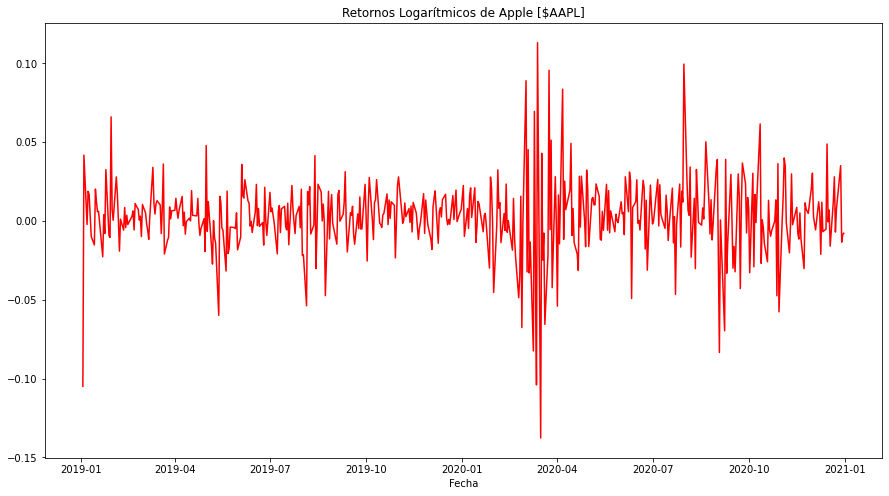

In [ ]:
# Gráfico de los retornos logarítmicos
plt.figure(figsize=(15,8))
plt.plot(df['Log Returns'], color = 'red')
plt.title('Retornos Logarítmicos de Apple [$AAPL]')
plt.xlabel('Fecha')
plt.show()

### 4 Volatilidad

#### 4.1 Volatilidad diaria y anual

La volatilidad diaria del activo es la desviación estándar de sus retornos o la raíz de la varianza:  

$$vol=desv(r)=\sqrt{Var(r)}$$

En finanzas, se utiliza con mayor frecuencia la volatilidad anualizada ($\sigma$) en lugar de la volatilidad diaria. Teniendo en cuenta que en cada año hay 252 días bursátiles:

$$ \sigma^{2} = \sum_{1}^{252} Var_{diaria}$$
$$ \sigma^{2} = 252 \sigma_{diaria}^{2}$$

Se saca la raíz cuadra a ambos lados para calcular la volatilidad:

$$ \sqrt{\sigma^{2}} = \sqrt{252 \sigma_{diaria}^{2}}$$
$$ \sigma = \sigma_{diaria} \sqrt{252}$$


In [ ]:
# Calculamos la volatilidad diaria con los retornos logaritmicos.
vol_d = np.std(df['Log Returns']) 

# Anualizamos la volatilidad diaria.
vol_a = vol_d * np.sqrt(252)

print("Volatilidad diaria: {:.4f} %".format(100*vol_d))
print("Volatilidad anualizada: {:.4f} %".format(100*vol_a))

Volatilidad diaria: 2.3853 %
Volatilidad anualizada: 37.8647 %
